In [36]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

In [37]:
# Importing the heart disease data as a dataframe
df = pd.read_csv("heart_disease_data.csv")

In [38]:
# The first five entries
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [39]:
# The characteristics of the dataframe
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,54.372093,0.681063,0.973422,131.717608,246.129568,0.149502,0.531561,149.780731,0.322259,1.033887,1.401993,0.727575,2.312292,0.548173
std,9.096579,0.466841,1.032452,17.547744,51.972170,0.357176,0.525833,22.902804,0.468120,1.160480,0.617411,1.025770,0.612766,0.498503
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,134.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [40]:
# The shape of the dataframe with the nonapplicable entries removed
df.shape

(301, 14)

In [41]:
# Separating the dataframe into attributes and classes
dfX = df.drop(columns = ["target"])
sy = df.target

In [42]:
# Splitting the data into a 70/30 split between train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dfX, sy, test_size = 0.3)

In [104]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [105]:
# Training a SVC model
svc = SVC(kernel = 'linear', probability = True, random_state = 42)
svc = svc.fit(X_train, y_train)

In [106]:
# Testing the 
svc.score(X_test, y_test)

0.8241758241758241

In [108]:
# Predicting the chance of heart disease with the test set and changing them to lists
predicted = svc.predict(X_test)
p = predicted.tolist()
t = y_test.tolist()

In [109]:
# the amount that the model predicted correctly for if they have heart disease
num = 0
for i in range(0, len(p)):
    if p[i] == t[i] and t[i] == 1:
        num +=1
num

43

In [103]:
# how many the model predicted had heart disease
num = 0
for i in range(0, len(p)):
    if p[i] == 1:
        num +=1
num

55

In [110]:
# how many were diagnosed with heart disease
num = 0
for i in range(0, len(t)):
    if t[i] == 1:
        num += 1
num

47

In [112]:
# Training the random forest classifier model
rfc = RandomForestClassifier(random_state = 42)
rfc = rfc.fit(X_train, y_train)

In [113]:
# Testing the random forest classifier model
rfc.score(X_test, y_test)

0.8461538461538461

In [134]:
# Training the k-nearest neighbours model
knn = KNeighborsClassifier(n_neighbors = 30)
knn = knn.fit(X_train, y_train)

In [135]:
# Testing the k-nearest neighbours model
knn.score(X_test, y_test)

0.6373626373626373

In [143]:
# Putting the features into a list and finding the importance of the features
importance = rfc.feature_importances_
features = dfX.columns
features.tolist()

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

In [144]:
# Creating a list that orders the importance of the features
feature_imp = pd.DataFrame({'Feature': features, 'Importance': importance}).sort_values('Importance', ascending=False) 
print(feature_imp)

     Feature  Importance
7    thalach    0.155556
2         cp    0.129935
11        ca    0.113753
4       chol    0.094006
12      thal    0.093984
9    oldpeak    0.087511
3   trestbps    0.086570
0        age    0.080450
8      exang    0.046466
10     slope    0.040822
1        sex    0.036647
6    restecg    0.025970
5        fbs    0.008329


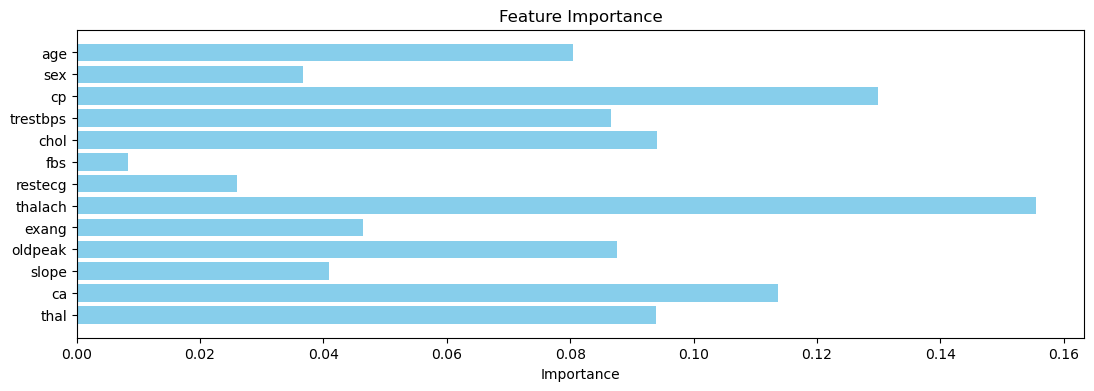

In [145]:
# A bar graph of the feature importances
plt.figure(figsize=(13, 4))
plt.barh(features, importance, color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  
plt.show()

In [147]:
# Importing the new patient data as a dataframe
new_patients = pd.read_csv("new_patient_data.csv")
new_patients

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,58,0,0,170,225,1,0,146,1,2.8,1,2,1
1,80,1,2,130,21,0,1,162,0,3.4,0,1,2
2,31,1,3,130,232,1,1,190,0,1.9,2,3,2
3,45,1,1,110,242,0,0,138,0,1.1,0,2,2
4,57,0,2,180,432,0,1,171,1,0.5,1,0,2


In [148]:
# Predicting the condition of the patients
rfc.predict(new_patients)

array([0, 1, 1, 0, 1], dtype=int64)